# Example 02: Load a file, Perform a Non-sequential Ray Trace, Study Results.

In this example, skZemax API is used to:
- Load a native non-sequential Zemax example file: `Non-sequential\Miscellaneous\Digital_projector_flys_eye_homogenizer.zmx`.
    - A copy of this file will be saved as a new skZemax example file.
- Run an NCE ray trace (using the pre-configured setup of the example file).
- Capture two different NCE detectors in a python xarray format.
- Visualize the system and plot the incoherent detector image.

#### Load the System and Run the Ray Trace

In [8]:
from skZemax.skZemaxClass import skZemaxClass 
import os

skZemax = skZemaxClass()
# Open the native Zemax example file (SamplesDir() function comes from the base stand-alone class of Zemax).
skZemax.Utilities_OpenZemaxFile(skZemax.SamplesDir() + os.sep + r'Non-sequential\Miscellaneous\Digital_projector_flys_eye_homogenizer.zmx', False)
# Run the ray trace
skZemax.NCE_RunRayTrace()
# Save a copy of the of this file.
skZemax.Utilities_SaveZemaxFileAs(skZemax.Utilities_skZemaxExampleDir() + os.sep + r'e02_SimpleRayTrace.zmx')



OpenZemaxFile ::  Opening Zemax file [C:\Users\User\Documents\Zemax\SAMPLES\Non-sequential\Miscellaneous\Digital_projector_flys_eye_homogenizer.zmx].

NCE_RunRayTrace :: Starting ray trace....
|████████████████████████████████████████| 100% in 5.6s (0.18%/s) 
NCE_RunRayTrace :: Done ray trace!

SaveZemaxFileAs :: Saving Current Zemax File As [E:\GitReposUSASK\CodeRepos\zemaxpyll\docs\source\Examples\e02_SimpleRayTrace.zmx].


#### Gather the detector information

The file has two detectors: 
- index 4 (before the fly's eye) 
- index 7 (Homog. Plane)

We can locate these indices in skZemax API with `skZemax.NCE_GetDetectorLocations()`

In [ ]:
# Get xarray of detector data
det_index = skZemax.NCE_GetDetectorLocations()
print("Detectors indices: {}".format(det_index))
detector1_xr = skZemax.NCE_GetDetectorComplete(det_index[0])
detector2_xr = skZemax.NCE_GetDetectorComplete(det_index[1])

Detectors indices: [4, 7]


#### Make a Visualization of the System

In [ ]:
# Make a visualization of the system
skZemax_example_dir = skZemax.Utilities_skZemaxExampleDir()
skZemax.Visualization_NSC_3DViewer(saved_image_location=skZemax_example_dir + os.sep + r'e02_SimpleRayTrace_3DView.png', 
                                   color_rays_by_NSC_options="SegmentNumber")

#### Close down Zemax

In [11]:
# No longer need the skZemax class, cleaning it up
del skZemax
skZemax = None

#### Display the System and Study the Detector Images

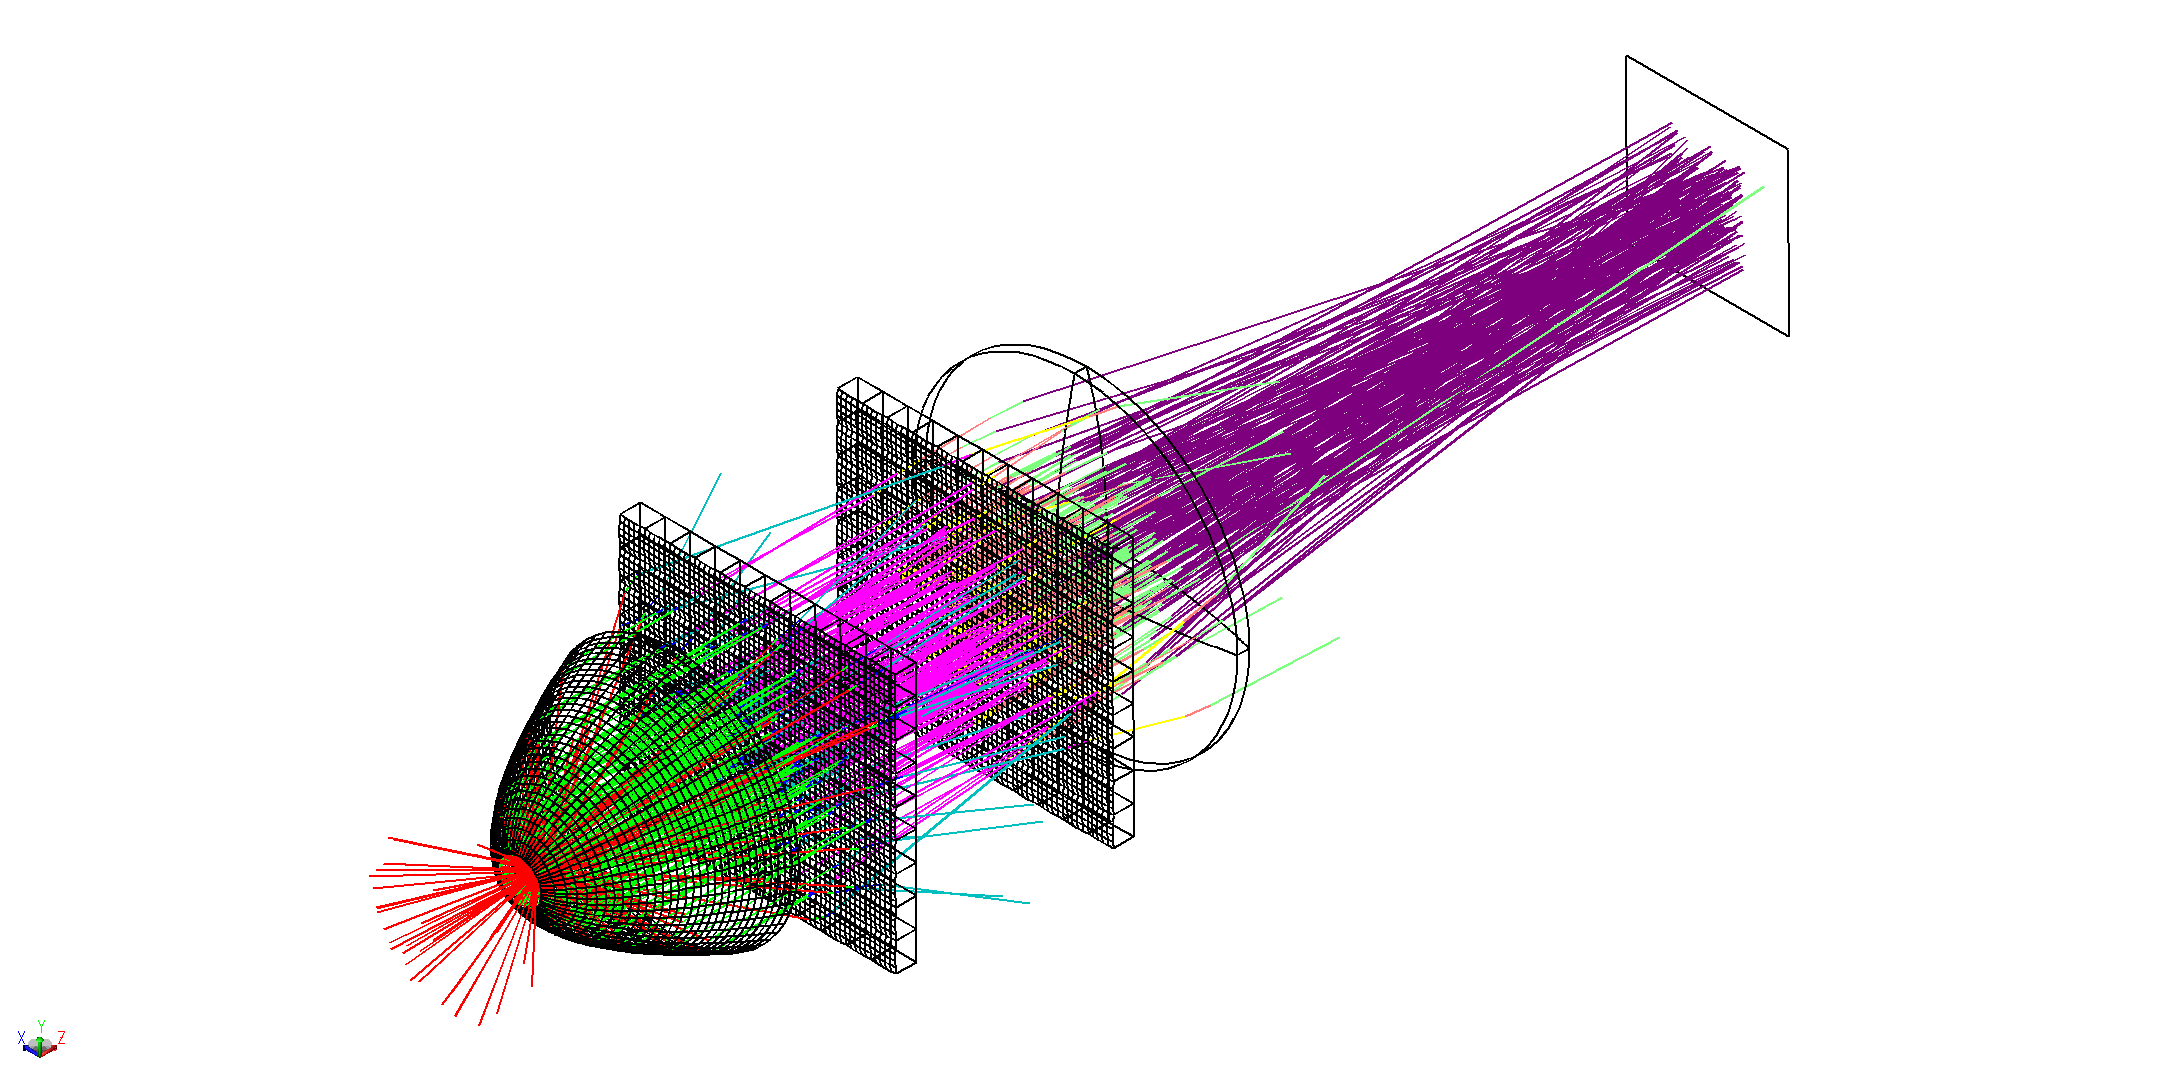

In [12]:
# Display the 3D view 
from IPython.display import Image
Image(filename=skZemax_example_dir + os.sep + r'e02_SimpleRayTrace_3DView.png', width=800) 

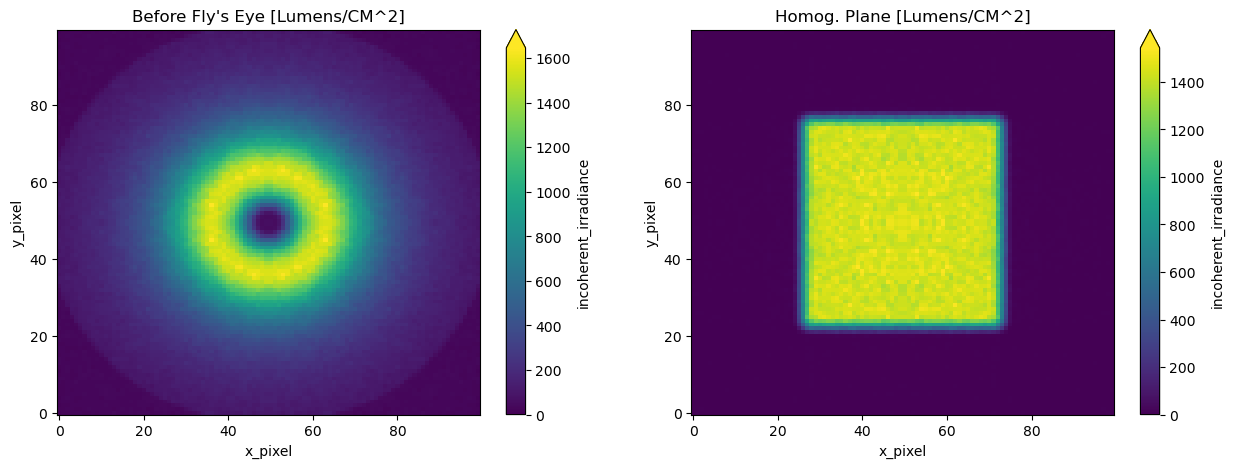

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplot_mosaic([
    ['d1', 'd2']
], figsize=(15, 5))
detector1_xr.incoherent_irradiance.plot.imshow(ax=ax['d1'], 
                                               vmin=0, 
                                               vmax=float(detector1_xr.attrs['Peak Incoherent Irradiance']))
ax['d1'].set_title('{} [{}]'.format(detector1_xr.attrs['Comment'], 
                                    detector1_xr.attrs['Irradiance Units']))
detector2_xr.incoherent_irradiance.plot.imshow(ax=ax['d2'], 
                                               vmin=0, 
                                               vmax=float(detector2_xr.attrs['Peak Incoherent Irradiance']))
ax['d2'].set_title('{} [{}]'.format(detector2_xr.attrs['Comment'], 
                                    detector2_xr.attrs['Irradiance Units']))
plt.savefig(skZemax_example_dir + os.sep + r'e02_SimpleRayTrace_Detector.png')

In [14]:
print(detector1_xr)

<xarray.Dataset> Size: 965kB
Dimensions:                       (y_pixel: 100, x_pixel: 100, y_angle: 100,
                                   x_angle: 100)
Coordinates:
  * y_pixel                       (y_pixel) int64 800B 0 1 2 3 4 ... 96 97 98 99
    y_distance                    (y_pixel) float64 800B -22.0 -21.56 ... 22.0
  * y_angle                       (y_angle) int64 800B -90 -88 -86 ... 86 88 90
  * x_pixel                       (x_pixel) int64 800B 0 1 2 3 4 ... 96 97 98 99
    x_distance                    (x_pixel) float64 800B -22.0 -21.56 ... 22.0
  * x_angle                       (x_angle) int64 800B -90 -88 -86 ... 86 88 90
Data variables:
    power                         (y_pixel, x_pixel) float64 80kB 0.03453 ......
    incoherent_irradiance         (y_pixel, x_pixel) float64 80kB 17.84 ... 1...
    incoherent_radiant_intensity  (y_pixel, x_pixel) float64 80kB 0.0 ... 0.0
    incoherent_radiance_position  (y_pixel, x_pixel) float64 80kB 2.839 ... 2...
    incoherent_